# VS code and MySQL Connection

To begin with;

Let us import the required modules.

Define the variables you need to use and create a connection as shown in the code below.

In [11]:
# required modules

import mysql.connector
from mysql.connector import Error

# parameters
host = "localhost"
user = "root"
password = "1234"
database = "moviesbasic"

try:
    connection = mysql.connector.connect(host=host, user=user, password=password, database=database)
    if connection.is_connected():
        print("Connection to the database has been successfully established. ")
except Error as e:
    print(f"Error: {e}")

Connection to the database has been successfully established. 


# Show tables in our database

In [12]:
cursor = connection.cursor()
query1 = "SHOW TABLES;"
cursor.execute(query1)
tables = cursor.fetchall()
print(f"The tables in our database are: \n {tables}")


The tables in our database are: 
 [('movies_basic',)]


# Access the table in the databse and save it as a Data Frame 

In [15]:
# import pandas so that we can use pd.read_sql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

query2 = "SELECT * FROM movies_basic;"
movies_df = pd.read_sql(query2, connection)
movies_df.head()

,idmovies_basic,title,genre,year,director,rating,numrating
0,1,Vertigo,Mystery,1958,Alfred Hitchcock,8,263575
1,2,The Innocents,Horror,1961,Jack Clayton,8,20207
2,3,Lawrence of Arabia,Adventure,1962,David Lean,8,202778
3,4,The Deer Hunter,Drama,1978,Michael Cimino,9,905335
4,5,Amadeus,Drama,1984,Milos Forman,9,558043


In [16]:
movies_df.tail()

,idmovies_basic,title,genre,year,director,rating,numrating
30,31,K-19: The Widowmaker,Thriller,2002,Kathryn Bigelow,6,530495
31,32,Wayne's World,Comedy,1992,Penelope Spheeris,7,203551
32,33,The Hurt Locker,Thriller,2008,Kathryn Bigelow,8,508932
33,34,The Matrix,Thriller,1999,Lana Wachowski,9,940593
34,35,Selma,Drama,2014,Ava DuVernay,10,853049


## Continue with Data understanding, processing, exploration, visualization and analysis

In [18]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idmovies_basic  35 non-null     int64 
 1   title           35 non-null     object
 2   genre           35 non-null     object
 3   year            35 non-null     int64 
 4   director        35 non-null     object
 5   rating          35 non-null     int64 
 6   numrating       35 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.0+ KB


In [28]:
movies_df[['rating','numrating']].describe()

,rating,numrating
count,35.000000,35.000000
mean,7.857143,510527.285714
std,1.458098,306152.966522
min,3.000000,13091.000000
25%,7.000000,215555.000000
50%,8.000000,558043.000000
75%,9.000000,755207.000000
max,10.000000,999486.000000


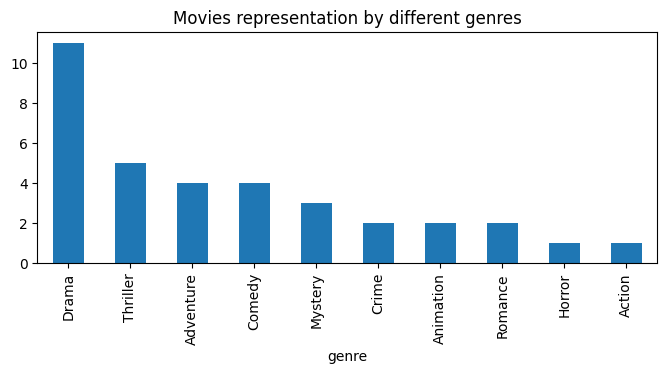

In [29]:
movies_df['genre'].value_counts().plot(kind='bar', title='Movies representation by different genres', figsize=(8,3));